In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#Final Plots
#---------------------------------------------------------------------


In [3]:
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes- mc have already a fake run period
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Last_Test.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Last_Test.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Last_Test.h5", 0, -1)
dfdata= qr_data.getDF()

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Last_Test.h5
Selecting events   [ 0 ,  11093908 ]  out of  11093908
number of events: 11093908
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Last_Test.h5
Selecting events   [ 0 ,  11093908 ]  out of  11093908
number of events: 11093908
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Last_Test.h5
Selecting events   [ 0 ,  19686714 ]  out of  19686714
number of events: 19686714


In [5]:
qr_mc1.correctAllParallel(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_",n_jobs=30) 
qr_mc2.correctAllParallel(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_",n_jobs=30)       

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5


In [6]:
dfmcEB= qr_mc1.df
dfmcEE= qr_mc2.df 
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')
frame2 = [dfmcEB, dfmcEE] 
data2 = pd.concat(frame2)
dfmc = data2.sample(frac=1).reset_index(drop=True)

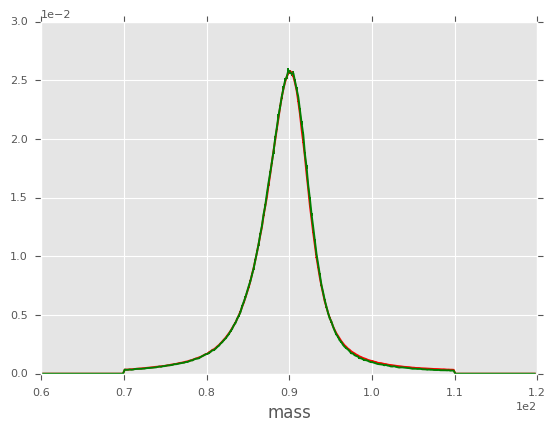

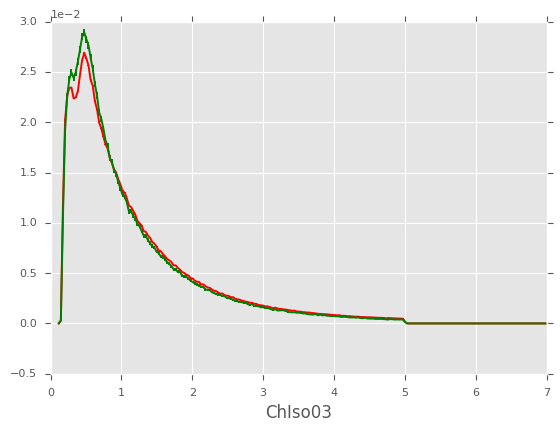

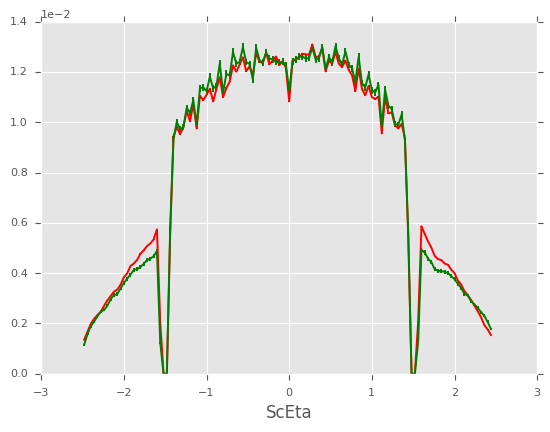

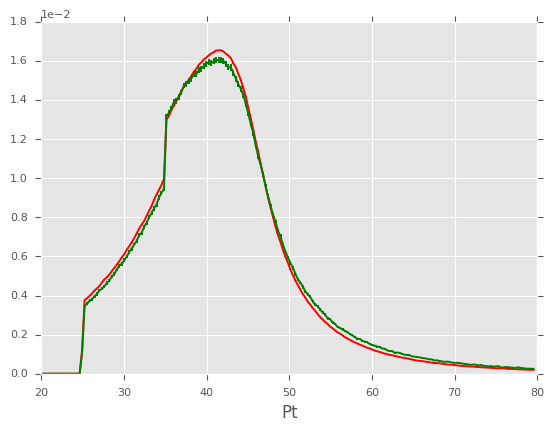

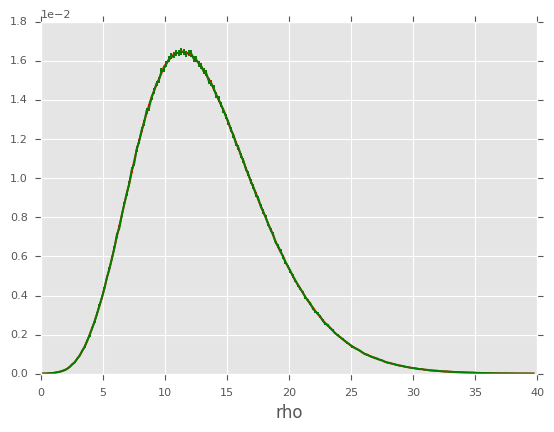

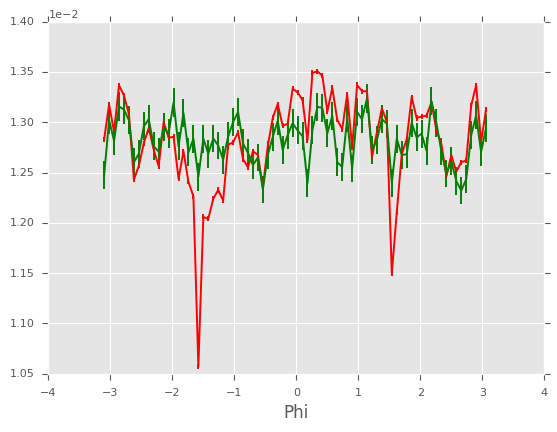

In [13]:
plt.style.use('ggplot')
dfd=dfdata
dfm=dfmc
Xlist=["mass","ChIso03","ScEta","Pt","rho","Phi"]
for yvar in Xlist:
    if yvar=="ScEta": rv=np.arange(-2.5,2.5,0.04)
    if yvar=="Pt":rv=np.arange(20.0,80.0,0.3)
    if yvar=='rho':rv=np.arange(0.0,40.0,0.2)
    if yvar=="Phi":rv=np.arange(-3.14,3.14,0.08)
    if yvar=="mass":rv=np.arange(60.,120.,0.2)
    if yvar=="ChIso03":rv=np.arange(0.1,7.,0.03)
    fig, ax = plt.subplots(dpi=400)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfd[yvar], rv, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv,Weight=dfm["weight"], Color="g")
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

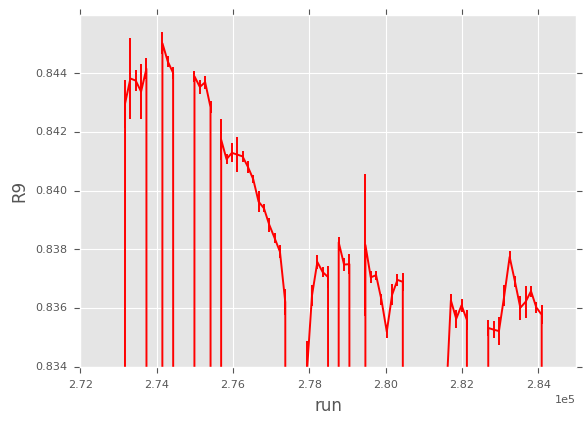

In [24]:
plt.style.use('ggplot')
dfd=dfdata

Xlist=["R9"]#","ChIso03","ScEta","Pt","rho","Phi"]
for yvar in Xlist:
    fig, ax = plt.subplots(dpi=400)
    ax.set_xlabel(yvar)
    ax.set_ylim(0.5,1.0)
    ax.set_xlabel('run')
    ax.set_ylabel(yvar)
    #plot.Profile(dfmc_WithTime['run']  , dfmc_WithTime[yvar]        ,100,271000.,285000.,ax, 'green',dfmc_WithTime["weight"])
    plot.Profile(dfdata['run'], dfdata[yvar],100  ,271000.,285000., 0.5,1.0  ,ax, 'red')
    #ProfileWeighted(dfmc_WithTime['run']  , dfmc_WithTime[yvar+'_corr'],100,271000.,285000.,ax, 'blue',dfmc_WithTime["weight"])
    #ax.set_title('run')
    ax.set_ylim([0.834,0.846])
    ax.set_xlim([272000,285000])
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
    fig.savefig('FINALPLOTS/R9time.png', dpi=fig.dpi)